In [ ]:
pip install -U ydata-profiling

In [ ]:
from logging import warning
import pandas as pd
import matplotlib.pyplot as plt
#from dataprep.eda import create_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_pd = pd.read_excel("/content/Order sales summary-01JAN23-31DEC23.xlsx")
df_pd.head()

,Id,Created at,Created by,Customer,Representative,Grand total,Balance,Paid,Delivery status,Payment status,...,Manufacturer name,Product name,QTY,Delivered,Item specific discount,Manufacturer specific discount,Total invoice discount,Discount type,Customer discount,Free cases
0,888992,7/17/2023 08:02 AM,Admin,Brothers Bagels,Namik Soltan,250.0000,250.0000,0.0,UNFULFILLED,UNPAID,...,GNGR Labs,Ginger Shots / Immunity Aid / 2 fl oz,4,0,0,0.0000,48.8,INVOICE TOTAL DISCOUNT,0.0,0
1,888992,7/17/2023 08:02 AM,Admin,Brothers Bagels,Namik Soltan,250.0000,250.0000,0.0,UNFULFILLED,UNPAID,...,GNGR Labs,Ginger Shots / Immunity Booster / 2 fl oz,4,0,0,0.0000,48.8,INVOICE TOTAL DISCOUNT,0.0,0
2,888992,7/17/2023 08:02 AM,Admin,Brothers Bagels,Namik Soltan,250.0000,250.0000,0.0,UNFULFILLED,UNPAID,...,GNGR Labs,Ginger Shots / Digestive Aid / 2 fl oz,2,0,0,0.0000,48.8,INVOICE TOTAL DISCOUNT,0.0,0
3,220976,4/13/2023 02:58 PM,Ivan Khymych,Neptune Deli & Grocery,Ivan Khymych,401.1292,401.1292,0.0,UNFULFILLED,UNPAID,...,GNGR Labs - 1,Ginger Shots / Vitamin C / 2 fl oz,4,0,0,116.8308,0.0,MANUFACTURER SPECIFIC DISCOUNT,0.0,0
4,220976,4/13/2023 02:58 PM,Ivan Khymych,Neptune Deli & Grocery,Ivan Khymych,401.1292,401.1292,0.0,UNFULFILLED,UNPAID,...,GNGR Labs - 1,Ginger Shots / Immunity Aid / 2 fl oz,9,0,0,116.8308,0.0,MANUFACTURER SPECIFIC DISCOUNT,0.0,0


In [ ]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              466 non-null    int64  
 1   Created at                      466 non-null    object 
 2   Created by                      466 non-null    object 
 3   Customer                        466 non-null    object 
 4   Representative                  466 non-null    object 
 5   Grand total                     466 non-null    float64
 6   Balance                         466 non-null    float64
 7   Paid                            466 non-null    float64
 8   Delivery status                 466 non-null    object 
 9   Payment status                  466 non-null    object 
 10  Order Status                    466 non-null    object 
 11  Delivery methods                16 non-null     object 
 12  Manufacturer name               466 

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_pd, title="Profiling Report")

In [ ]:
# @title Report Order sales summary
profile

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pandas as pd
import numpy as np

def preprocess_data(data):
  """
  Data preprocessing: data type conversion and cleaning.

  Args:
    data: A Pandas DataFrame with the source data.

  Returns:
    Pandas DataFrame with the processed data.
  """
  # Convert creation date to datetime type
  data['Created at'] = pd.to_datetime(data['Created at'])

  # Remove currency symbols and thousands separators from numeric columns
  numeric_cols = ['Grand total', 'Balance', 'Paid', 'Item specific discount',
                  'Manufacturer specific discount', 'Total invoice discount',
                  'Customer discount']
  for col in numeric_cols:
    # Check if the column contains text values
    if data[col].dtype == 'object':
      # Replace missing values with an empty string to avoid errors
      data[col] = data[col].fillna('')
      # Remove characters and convert to numbers
      data[col] = data[col].str.replace('[$,]', '', regex=True).astype(float)
    else:
      # If the column is already numeric, check for missing values
      if np.isnan(data[col]).any():
        print(f"Warning: Column '{col}'contains missing values (NaN). ")

  return data

In [ ]:
processed_data = preprocess_data(df_pd)

In [ ]:
processed_data

,Id,Created at,Created by,Customer,Representative,Grand total,Balance,Paid,Delivery status,Payment status,...,Manufacturer name,Product name,QTY,Delivered,Item specific discount,Manufacturer specific discount,Total invoice discount,Discount type,Customer discount,Free cases
0,888992,2023-07-17 08:02:00,Admin,Brothers Bagels,Namik Soltan,250.0000,250.0000,0.0,UNFULFILLED,UNPAID,...,GNGR Labs,Ginger Shots / Immunity Aid / 2 fl oz,4,0,0,0.0000,48.8,INVOICE TOTAL DISCOUNT,0.0,0
1,888992,2023-07-17 08:02:00,Admin,Brothers Bagels,Namik Soltan,250.0000,250.0000,0.0,UNFULFILLED,UNPAID,...,GNGR Labs,Ginger Shots / Immunity Booster / 2 fl oz,4,0,0,0.0000,48.8,INVOICE TOTAL DISCOUNT,0.0,0
2,888992,2023-07-17 08:02:00,Admin,Brothers Bagels,Namik Soltan,250.0000,250.0000,0.0,UNFULFILLED,UNPAID,...,GNGR Labs,Ginger Shots / Digestive Aid / 2 fl oz,2,0,0,0.0000,48.8,INVOICE TOTAL DISCOUNT,0.0,0
3,220976,2023-04-13 14:58:00,Ivan Khymych,Neptune Deli & Grocery,Ivan Khymych,401.1292,401.1292,0.0,UNFULFILLED,UNPAID,...,GNGR Labs - 1,Ginger Shots / Vitamin C / 2 fl oz,4,0,0,116.8308,0.0,MANUFACTURER SPECIFIC DISCOUNT,0.0,0
4,220976,2023-04-13 14:58:00,Ivan Khymych,Neptune Deli & Grocery,Ivan Khymych,401.1292,401.1292,0.0,UNFULFILLED,UNPAID,...,GNGR Labs - 1,Ginger Shots / Immunity Aid / 2 fl oz,9,0,0,116.8308,0.0,MANUFACTURER SPECIFIC DISCOUNT,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,666130,2023-01-03 13:51:00,Ivan Vasylets,Park view market,Ivan Vasylets,99.6400,99.6400,0.0,UNFULFILLED,UNPAID,...,GNGR Labs - 1,Ginger Shots / Digestive Aid / 2 fl oz,1,0,0,89.6400,0.0,MANUFACTURER SPECIFIC DISCOUNT,0.0,0
462,666130,2023-01-03 13:51:00,Ivan Vasylets,Park view market,Ivan Vasylets,99.6400,99.6400,0.0,UNFULFILLED,UNPAID,...,GNGR Labs - 1,Ginger Shots / Immunity Aid / 2 fl oz,2,0,0,89.6400,0.0,MANUFACTURER SPECIFIC DISCOUNT,0.0,0
463,255832,2023-01-03 11:33:00,Ivan Vasylets,Uptown Whole Foods,Ivan Vasylets,309.0988,309.0988,0.0,UNFULFILLED,UNPAID,...,GNGR Labs - 1,Ginger Shots / Immunity Aid / 2 fl oz,5,0,0,89.3412,0.0,MANUFACTURER SPECIFIC DISCOUNT,0.0,0
464,255832,2023-01-03 11:33:00,Ivan Vasylets,Uptown Whole Foods,Ivan Vasylets,309.0988,309.0988,0.0,UNFULFILLED,UNPAID,...,GNGR Labs - 1,Ginger Shots / Immunity Booster / 2 fl oz,5,0,0,89.3412,0.0,MANUFACTURER SPECIFIC DISCOUNT,0.0,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_product_analysis(data, product_col='Product name', grand_total_col='Grand total'):
  product_data = data.groupby(product_col)[grand_total_col].agg(['sum', 'count']).sort_values(by='sum', ascending=False)
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
  sns.set_theme(style="whitegrid")
  palette = sns.color_palette("Set2")
  product_data['sum'].plot(kind='bar', ax=axes[0], color=palette)
  axes[0].set_title("Total sales by product", fontsize=14)
  axes[0].set_xlabel("Product", fontsize=12)
  axes[0].set_ylabel("Sales amount", fontsize=12)
  axes[0].grid(axis='y', alpha=0.5)
  axes[0].set_axisbelow(True)
  for p in axes[0].patches:
      height = p.get_height()
      axes[0].annotate(f"{height:.0f} ({(height/product_data['sum'].sum())*100:.0f}%)",
                  (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
  axes[0].spines['top'].set_visible(False)
  axes[0].spines['right'].set_visible(False)
  axes[0].spines['left'].set_visible(False)
  product_data['count'].plot(kind='bar', ax=axes[1], color=palette)
  axes[1].set_title("Distribution of orders by product", fontsize=14)
  axes[1].set_xlabel("Product.", fontsize=12)
  axes[1].set_ylabel("Number of orders", fontsize=12)
  axes[1].grid(axis='y', alpha=0.5)
  axes[1].set_axisbelow(True)
  for p in axes[1].patches:
      height = p.get_height()
      axes[1].annotate(f"{height:.0f} ({(height/product_data['count'].sum())*100:.0f}%)",
                  (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
  axes[1].spines['top'].set_visible(False)
  axes[1].spines['right'].set_visible(False)
  axes[1].spines['left'].set_visible(False)
  plt.tight_layout()
  for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  plt.show()

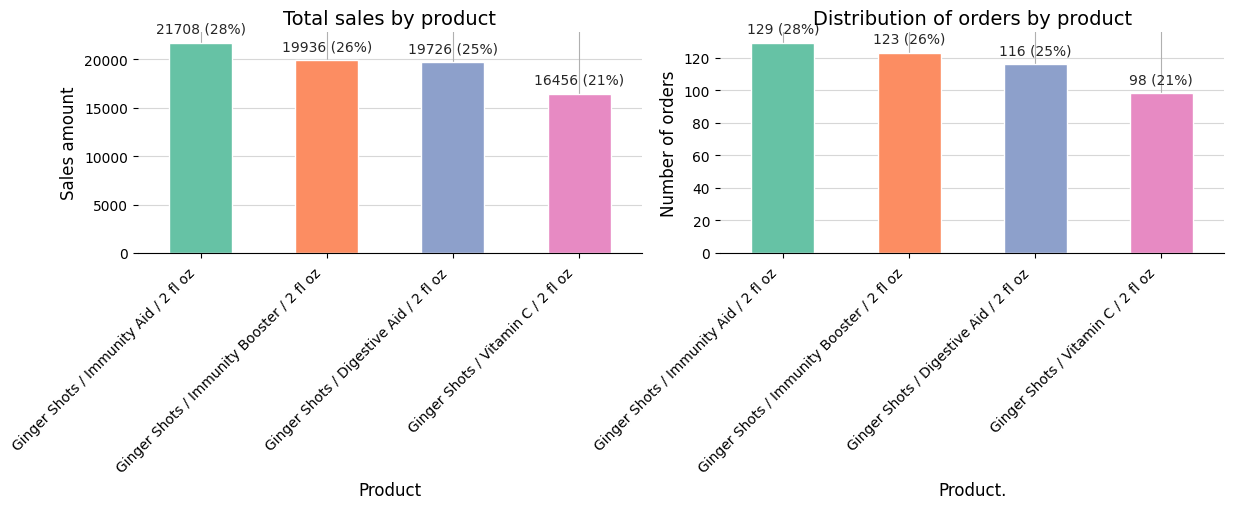

In [ ]:
# After preliminary data processing
visualize_product_analysis(processed_data)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_sales_trends(data, customer_col='Customer', product_col='Product name',
                           grand_total_col='Grand total', qty_col='QTY'):
  """
  Visualizes sales trends.

  Args:
    data: Pandas DataFrame with the processed data.
    customer_col: The name of the column with customers.
    product_col: The name of the column with products.
    grand_total_col: Name of the column with the sales total.
    qty_col: The name of the column with the quantity of ordered products.
  """
  # Sales amount for each client (top 10)
  plt.figure()
  palette = sns.color_palette("Set2")
  top_customers = data.groupby(customer_col)[grand_total_col].sum().nlargest(10)
  top_customers.plot(kind='bar', color=palette)

  plt.title("Total sales by customer (top 10)", fontsize=14)
  plt.xlabel("Client", fontsize=12)
  plt.ylabel("Sales amount", fontsize=12)
  plt.xticks(rotation=45, ha='right')
  plt.grid(axis='y', alpha=0.5)
  plt.tight_layout()

  # Add annotations with values
  for p in plt.gca().patches:
    height = p.get_height()
    plt.annotate(f"{height:.0f}",
                   (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

  plt.show()

  # Sales amount by month (with date formatting and annotations)
  plt.figure()
  monthly_sales = data.groupby(data['Created at'].dt.to_period('M'))[grand_total_col].sum()
  monthly_sales.index = monthly_sales.index.to_timestamp()
  monthly_sales.plot(kind='line')
  plt.title("Amount of sales by month")
  plt.xlabel("Month")
  plt.ylabel("Sales amount")

  # Add dotted lines and values
  for x, y in monthly_sales.items():
      plt.axvline(x=x, linestyle='--', color='gray', alpha=0.5)  # Vertical dotted line
      plt.text(x, y, f'{y:.0f}', ha='center', va='bottom')  # Value above the line

  plt.show()

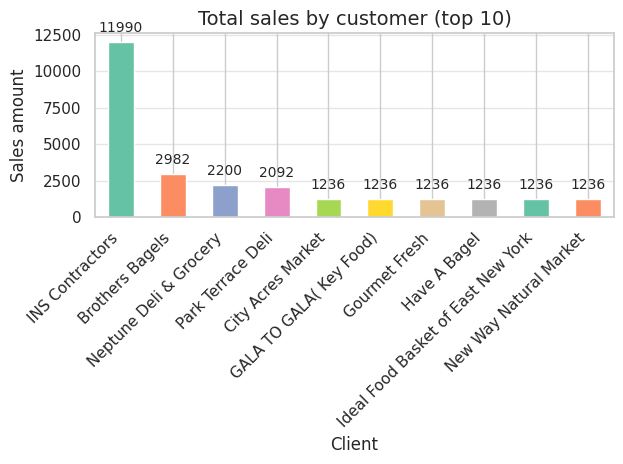

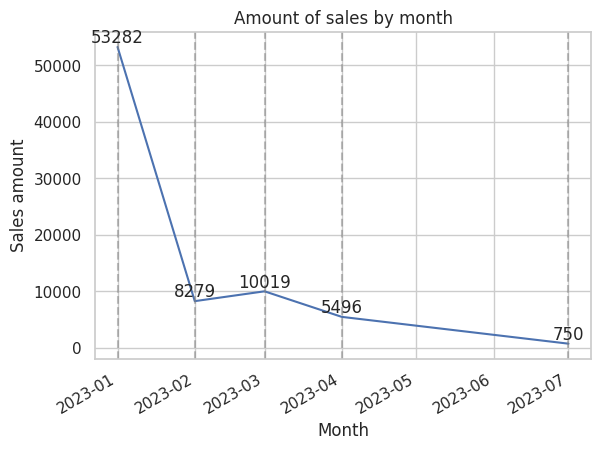

In [ ]:
visualize_sales_trends(processed_data)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_discount_analysis(data, discount_type_col='Discount type',
                                grand_total_col='Grand total',
                                total_discount_col='Total invoice discount'):
  """
  Visualizes the analysis of discounts.

  Args:
    data: Pandas DataFrame with the processed data.
    discount_type_col: Name of the column with the discount type.
    grand_total_col: Name of the column with the sales total.
    total_discount_col: Name of the column with the discount amount.
  """
  # Discount amount for each type of discount
  plt.figure()
  palette = sns.color_palette("Set2")
  data.groupby(discount_type_col)[total_discount_col].sum().sort_values(ascending=False).plot(kind='bar', color=palette)
  plt.title("Amount of discounts by type", fontsize=14)
  plt.xlabel("Discount type", fontsize=12)
  plt.ylabel("The amount of discounts", fontsize=12)
  plt.xticks(rotation=45, ha='right')
  plt.grid(axis='y', alpha=0.5)
  plt.tight_layout()
  for p in plt.gca().patches:
      height = p.get_height()
      plt.gca().annotate(f"{height:.0f}",
                  (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['left'].set_visible(False)
  plt.show()

  # Amount of discounts for each client (top 10)
  plt.figure()
  top_customers_discount = data.groupby('Customer')[total_discount_col].sum().nlargest(10)
  top_customers_discount.plot(kind='bar', color=palette)
  plt.title("Amount of discounts by customer (top 10)", fontsize=14)
  plt.xlabel("Client", fontsize=12)
  plt.ylabel("The amount of discounts", fontsize=12)
  plt.xticks(rotation=45, ha='right')
  plt.grid(axis='y', alpha=0.5)
  plt.tight_layout()
  for p in plt.gca().patches:
      height = p.get_height()
      plt.gca().annotate(f"{height:.0f}",
                  (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['left'].set_visible(False)
  plt.show()

  # Distribution of the discount amount for different types of discounts
  plt.figure()
  sns.boxplot(x=data[discount_type_col], y=data[total_discount_col], palette=palette)
  plt.title("Distribution of the discount amount by type", fontsize=14)
  plt.xlabel("Discount type", fontsize=12)
  plt.ylabel("Discount amount", fontsize=12)
  plt.xticks(rotation=45, ha='right')
  plt.grid(axis='y', alpha=0.5)
  plt.tight_layout()
  plt.show()

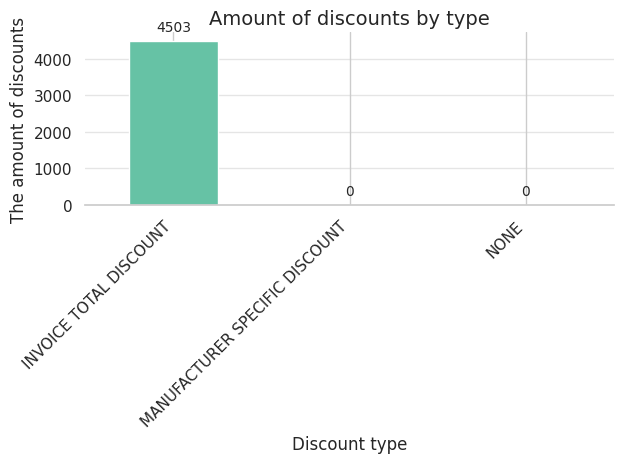

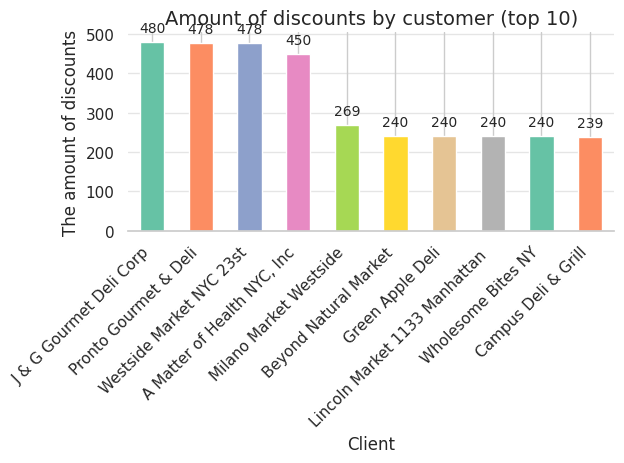

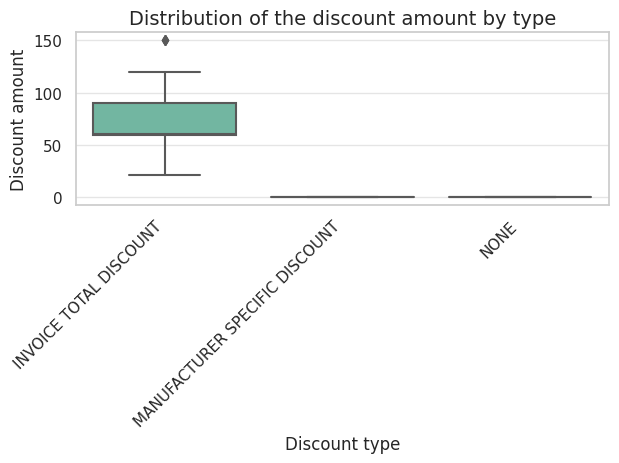

In [ ]:
visualize_discount_analysis(processed_data)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_delivery_analysis(data, delivery_status_col='Delivery status',
                                delivery_method_col='Delivery methods'):
  """
  Visualizes the delivery analysis.

  Args:
    data: A Pandas DataFrame with the processed data.
    delivery_status_col: The name of the column with the delivery status.
    delivery_method_col: The name of the column with the delivery method.
  """
  # Number of orders for each delivery status
  plt.figure()
  palette = sns.color_palette("Set2")
  data[delivery_status_col].value_counts().plot(kind='bar', color=palette)
  plt.title("Number of orders by delivery status", fontsize=14)
  plt.xlabel("Delivery status", fontsize=12)
  plt.ylabel("Number of orders", fontsize=12)
  plt.xticks(rotation=45, ha='right')
  plt.grid(axis='y', alpha=0.5)
  plt.tight_layout()
  for p in plt.gca().patches:
      height = p.get_height()
      plt.gca().annotate(f"{height:.0f}",
                  (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['left'].set_visible(False)
  plt.show()

  # Number of orders for each delivery method
  plt.figure()
  data[delivery_method_col].value_counts().plot(kind='bar', color=palette)
  plt.title("Number of orders by delivery method", fontsize=14)
  plt.xlabel("Delivery method", fontsize=12)
  plt.ylabel("Number of orders", fontsize=12)
  plt.xticks(rotation=45, ha='right')
  plt.grid(axis='y', alpha=0.5)
  plt.tight_layout()
  for p in plt.gca().patches:
      height = p.get_height()
      plt.gca().annotate(f"{height:.0f}",
                  (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['left'].set_visible(False)
  plt.show()

  # Pie chart of orders distribution by delivery status
  plt.figure()
  data[delivery_status_col].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                                colors=palette, textprops={'fontsize': 12})
  plt.title("Distribution of orders by delivery status", fontsize=14)
  plt.ylabel("")  # Remove the name of the Y-axis
  plt.show()

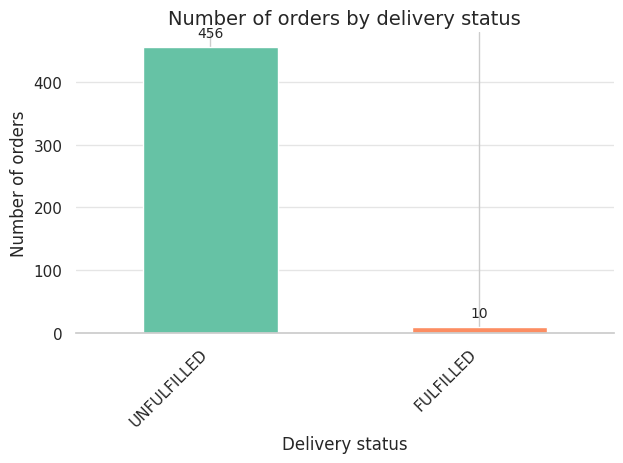

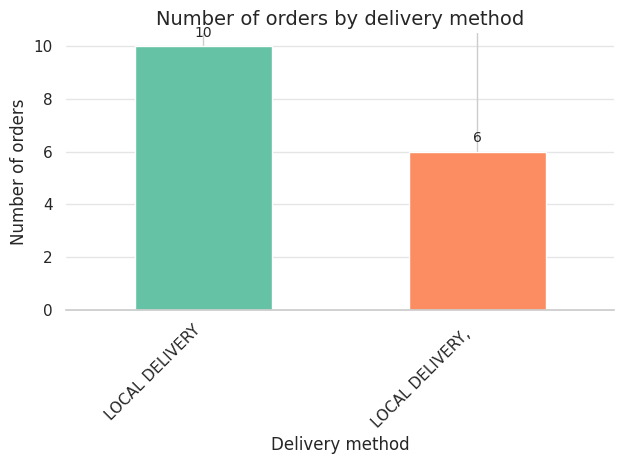

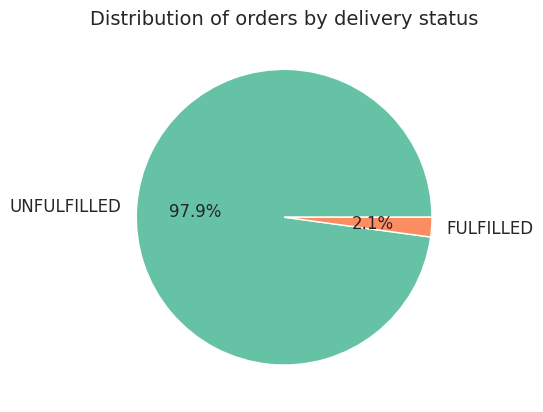

In [ ]:
visualize_delivery_analysis(processed_data)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_payment_analysis(data, payment_status_col='Payment status'):
  """
  Visualizes the payment analysis.

  Args:
    data: Pandas DataFrame with the processed data.
    payment_status_col: The name of the column with the payment status.
  """
  # Number of orders for each payment status
  plt.figure()
  palette = sns.color_palette("Set2")
  data[payment_status_col].value_counts().plot(kind='bar', color=palette)
  plt.title("Number of orders by payment status", fontsize=14)
  plt.xlabel("Payment status", fontsize=12)
  plt.ylabel("Number of orders", fontsize=12)
  plt.xticks(rotation=45, ha='right')
  plt.grid(axis='y', alpha=0.5)
  plt.tight_layout()
  for p in plt.gca().patches:
      height = p.get_height()
      plt.gca().annotate(f"{height:.0f}",
                  (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['left'].set_visible(False)
  plt.show()

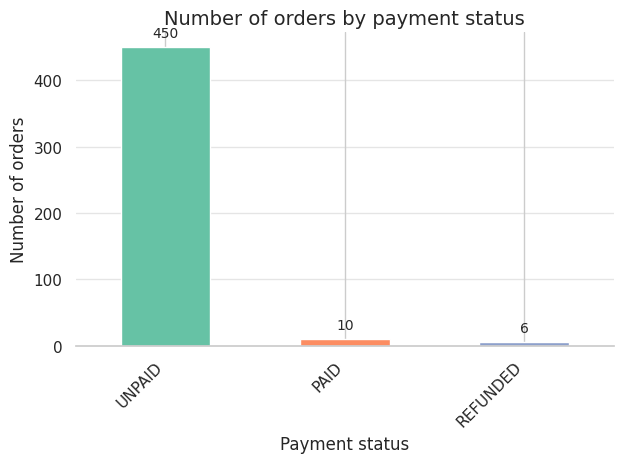

In [ ]:
visualize_payment_analysis(processed_data)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_combined_analysis(data, product_col='Product name',
                               grand_total_col='Grand total', qty_col='QTY',
                               delivery_status_col='Delivery status'):
  """
  Creates combined visualizations.

  Args:
    data: A Pandas DataFrame with the processed data.
    product_col: The name of the product column.
    grand_total_col: Name of the column with the sales total.
    qty_col: Name of the column with the quantity of products ordered.
    delivery_status_col: Name of the column with the delivery status.
  """
  # Scatter plot with coloring of points by product type
  plt.figure()
  palette = sns.color_palette("Set2")
  sns.scatterplot(x=data[qty_col], y=data[grand_total_col], hue=data[product_col], palette=palette)
  plt.title("Dependence between quantity and amount (by product)", fontsize=14)
  plt.xlabel("Quantity", fontsize=12)
  plt.ylabel("Sales amount", fontsize=12)
  plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.grid(True, alpha=0.5)
  plt.show()

  # Bar chart of the number of orders by product grouped by delivery status
  plt.figure()
  sns.countplot(x=product_col, hue=delivery_status_col, data=data, palette=palette)
  plt.title("Number of orders by product and delivery status", fontsize=14)
  plt.xlabel("Product", fontsize=12)
  plt.ylabel("Number of orders", fontsize=12)
  plt.xticks(rotation=45, ha='right')
  plt.legend(title="Delivery status", bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.grid(True, alpha=0.5)
  plt.show()

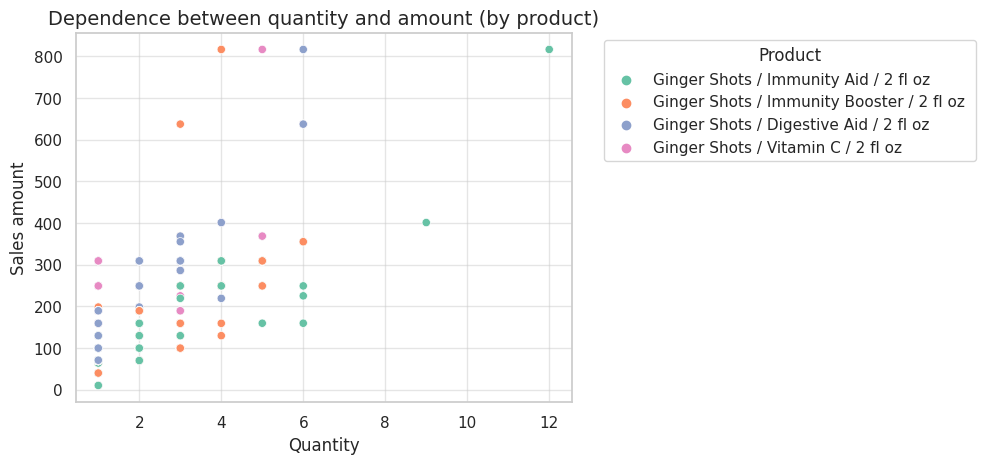

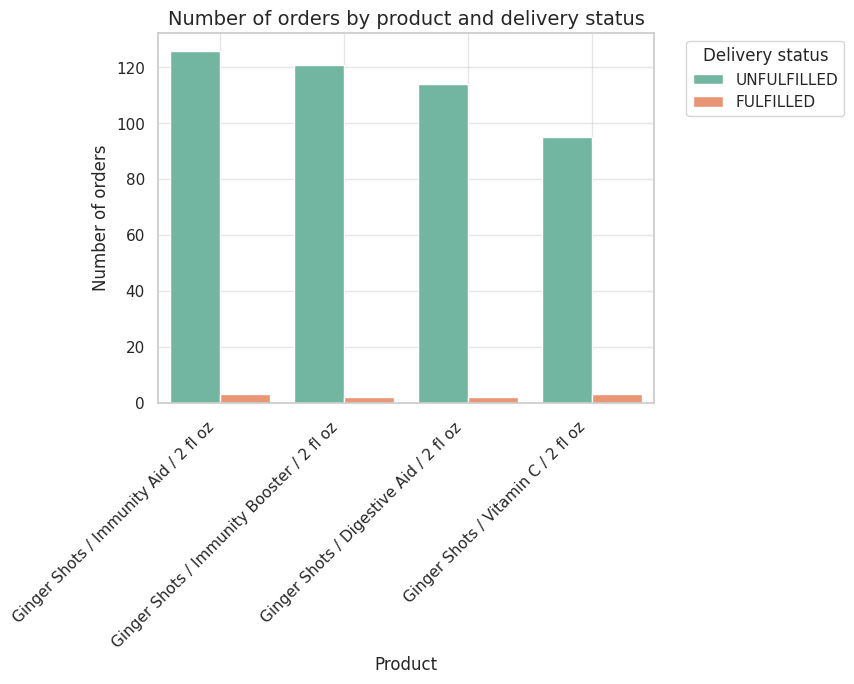

In [ ]:
visualize_combined_analysis(processed_data)